In [ ]:
__author__ = "Luidy"
__version__ = "0.2.0"
__status__ = "Prototype"

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#carregando a base de dados 
database = pd.read_csv("cancer.csv")
database

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
#procurando valores vazios
database.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [4]:
#procurando duplacatas
database.duplicated().sum()

np.int64(33)

In [5]:
#deletando duplicatas
database = database.drop_duplicates()
database.shape

(276, 16)

In [6]:
for i in database.columns:
    print(database[i].unique())

['M' 'F']
[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
[1 2]
[2 1]
[2 1]
[1 2]
[1 2]
[2 1]
[1 2]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
['YES' 'NO']


In [14]:
#traduzindo as colunas
traducao_colunas = {
    'GENDER': 'GENERO',
    'AGE': 'IDADE',
    'SMOKING': 'FUMANTE',
    'YELLOW_FINGERS': 'DEDOS_AMARELOS',
    'ANXIETY': 'ANSIEDADE',
    'PEER_PRESSURE': 'PRESSAO_SOCIAL',
    'CHRONIC DISEASE': 'DOENCA_CRONICA',
    'FATIGUE': 'FADIGA',
    'ALLERGY': 'ALERGIA',
    'WHEEZING': 'CHIADO_PEITO',
    'ALCOHOL CONSUMING': 'CONSUMO_ALCOOL',
    'COUGHING': 'TOSSE',
    'SHORTNESS OF BREATH': 'FALTA_AR',
    'SWALLOWING DIFFICULTY': 'DIFICULDADE_ENGOLIR',
    'CHEST PAIN': 'DOR_PEITO',
    'LUNG_CANCER': 'CANCER_PULMAO'
}

database = database.rename(columns = traducao_colunas)
database

,IDADE,FUMANTE,DEDOS_AMARELOS,ANSIEDADE,PRESSAO_SOCIAL,DOENCA_CRONICA,FATIGUE,ALLERGY,CHIADO_PEITO,CONSUMO_ALCOOL,TOSSE,FALTA_AR,DIFICULDADE_ENGOLIR,DOR_PEITO,GENERO_M,CANCER_PULMAO_YES
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,True,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,False,True
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1,False,False
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2,True,False
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2,True,False


In [8]:
#traduzindo strings para valores
database = pd.get_dummies(database,drop_first = True)
database

,IDADE,FUMANTE,DEDOS_AMARELOS,ANSIEDADE,PRESSAO_SOCIAL,DOENCA_CRONICA,FATIGUE,ALLERGY,CHIADO_PEITO,CONSUMO_ALCOOL,TOSSE,FALTA_AR,DIFICULDADE_ENGOLIR,DOR_PEITO,GENERO_M,CANCER_PULMAO_YES
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,True,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,False,True
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1,False,False
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2,True,False
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2,True,False


In [9]:
#definindo variaveis que carregarão as dependecias (y) e as independencias(y)
classe = "CANCER_PULMAO_YES"
x=database.drop(classe, axis=1)
y = database['CANCER_PULMAO_YES']
print(y)

0       True
1       True
2      False
3      False
4      False
       ...  
279     True
280    False
281    False
282    False
283     True
Name: CANCER_PULMAO_YES, Length: 276, dtype: bool


In [10]:
#separando o holp out
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3,random_state = 42)

#preparando o modelo para treinamento, utilizando randomflorest
modelo = RandomForestClassifier(n_estimators=100,random_state=42)

#treinando o modelo
modelo.fit(x_treino,y_treino)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
#pedindo para o modelo prever os resultados da nossa base de teste
previsoes = modelo.predict(x_teste)

#testando a acuracia do modelo
accuracy_score(y_teste,previsoes)

0.891566265060241

Text(0.5, 23.52222222222222, 'Previsoes do modelo')

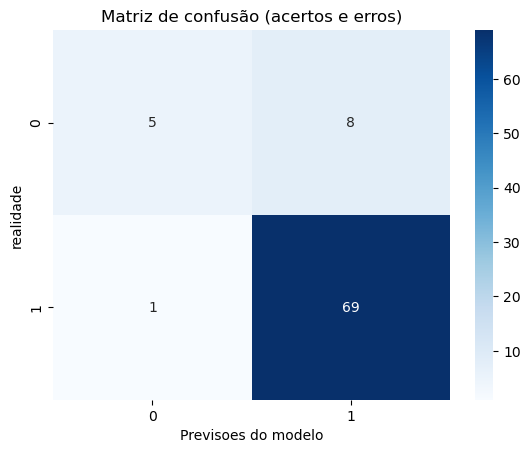

In [12]:
plt.figure()
sns.heatmap(confusion_matrix(y_teste,previsoes),annot=True,fmt="d", cmap="Blues")
plt.title("Matriz de confusão (acertos e erros)")
plt.ylabel('realidade')
plt.xlabel("Previsoes do modelo")

Text(0.5, 1.0, 'top 10 maiores causas de cancer (de acordo com o modelo)')

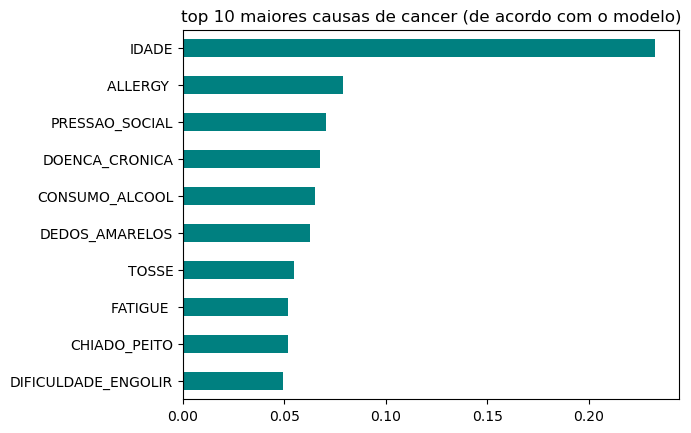

In [13]:
pureza= pd.Series(modelo.feature_importances_,index=x.columns)

plt.figure()
pureza.nlargest(10).sort_values().plot(kind="barh", color="teal")
plt.title("top 10 maiores causas de cancer (de acordo com o modelo)")

<Axes: xlabel='IDADE', ylabel='Count'>

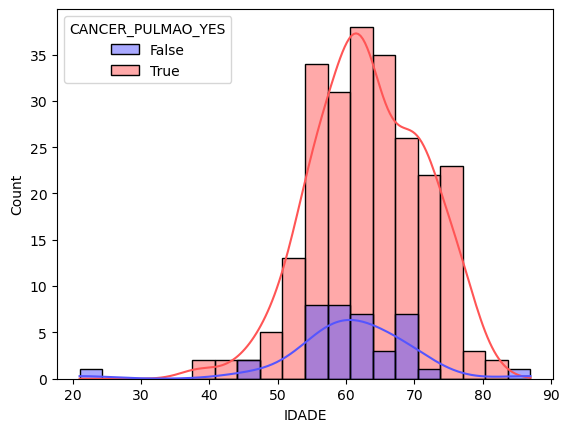

In [22]:
sns.histplot(data = database,x="IDADE",hue='CANCER_PULMAO_YES', kde=True, palette="seismic")

In [17]:
analise_fumo = database.groupby('CANCER_PULMAO_YES')['FUMANTE'].value_counts(normalize=True).unstack()

print("--- QUEM FUMA MAIS? (Em Porcentagem) ---")
print(analise_fumo)

--- QUEM FUMA MAIS? (Em Porcentagem) ---
FUMANTE                  1        2
CANCER_PULMAO_YES                  
False              0.50000  0.50000
True               0.44958  0.55042


In [18]:
correlacao = database['CANCER_PULMAO_YES'].corr(database['FUMANTE'])

print(f"\n--- CORRELAÇÃO MATEMÁTICA: {correlacao:.4f}")


--- CORRELAÇÃO MATEMÁTICA: 0.0349


In [20]:
database['CANCER_PULMAO_YES'].value_counts()

CANCER_PULMAO_YES
True     238
False     38
Name: count, dtype: int64